In [1]:
!gdown 1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC

Downloading...
From: https://drive.google.com/uc?id=1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC
To: /Users/davidhristov/Desktop/Intro to Data Science/DataScience/Labs/Lab2/main/newest_solved_notebooks/data_g1.csv
100%|██████████████████████████████████████| 9.79M/9.79M [00:01<00:00, 7.06MB/s]


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data_g1.csv')

In [5]:
df.drop(columns='id', inplace=True)

In [6]:
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
1,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
2,45,160,55,69.0,1.5,1.2,1,1,150,88,...,69,122,13.0,1,0.7,17,12,16,0,0
3,55,155,60,84.5,0.7,0.9,1,1,137,91,...,51,198,14.5,1,0.7,16,15,16,0,0
4,40,155,50,73.0,1.5,1.5,1,1,105,70,...,55,122,13.2,1,0.7,22,16,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119598,40,165,65,84.0,1.2,1.2,1,1,130,80,...,36,132,16.1,1,0.9,22,35,31,0,1
119599,25,165,55,71.0,1.0,1.0,1,1,124,75,...,64,82,16.0,1,0.8,24,16,14,0,1
119600,40,160,60,74.0,0.6,1.0,1,1,102,70,...,73,81,13.0,1,0.9,18,9,12,1,1
119601,40,175,80,86.0,1.5,1.0,1,1,127,81,...,35,81,14.5,1,0.8,23,31,32,0,1


In [7]:
df.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

<Axes: xlabel='smoking'>

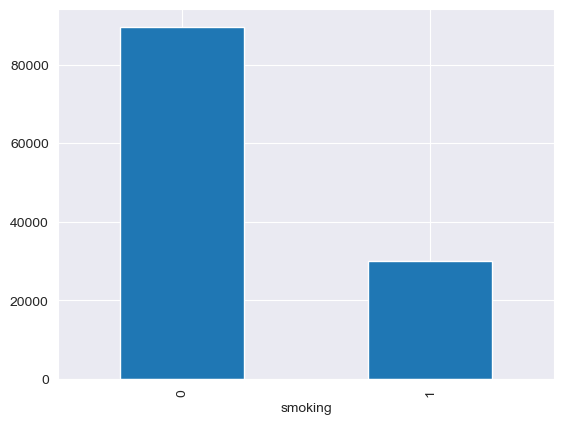

In [11]:
#dali e balansiran 
df['smoking'].value_counts().plot.bar()

In [13]:
x = df.drop(columns='smoking')
y = df['smoking']

In [18]:
#biten cekor - ZA XGBOOST 

from xgboost import XGBClassifier, cv, DMatrix, plot_importance

data_dmatrix = DMatrix(data = x, label = y)

params = { 
    'objective' : "binary:logistic",
    'colsample_bytree' : 0.7,
    'learning_rate' : 0.01,
    'max_depth' : 5
}

cv_results = cv(params=params, 
                dtrain=data_dmatrix, 
                nfold=5, 
                num_boost_round=50, 
                early_stopping_rounds=10, 
                metrics='auc', 
                as_pandas=True, 
                seed=123)

In [17]:
help(cv)

Help on function cv in module xgboost.training:

cv(params: Union[List, Dict[str, Any]], dtrain: xgboost.core.DMatrix, num_boost_round: int = 10, nfold: int = 3, stratified: bool = False, folds: sklearn.model_selection._split.StratifiedKFold = None, metrics: Sequence[str] = (), obj: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[numpy.ndarray, numpy.ndarray]]] = None, feval: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[str, float]]] = None, maximize: Optional[bool] = None, early_stopping_rounds: Optional[int] = None, fpreproc: Optional[Callable] = None, as_pandas: bool = True, verbose_eval: Union[bool, int, NoneType] = None, show_stdv: bool = True, seed: int = 0, callbacks: Optional[Sequence[xgboost.callback.TrainingCallback]] = None, shuffle: bool = True, custom_metric: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[str, float]]] = None) -> Union[Dict[str, float], pandas.core.frame.DataFrame]
    Cross-validation with given parameters.

In [15]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |  
 |      max_depth :  typing.Optional[int]
 |  
 |          Maximum tree depth for base learners.
 |  
 |      max_leaves : typing.Optional[int]
 |  
 |          Maximum number of leaves; 0 indicates no limit.
 |  
 |      max_bin : typing.Optional[int]
 |  
 |          If using histogram-based algorithm, maximum number of bins per feature
 |  
 |      grow_policy : typing.Optional[str]
 |  
 |          Tree growing policy.
 |  
 |   

In [19]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.783444,0.000822,0.781258,0.002241
1,0.809337,0.000660,0.806813,0.001880
2,0.839138,0.001168,0.835914,0.002633
3,0.835425,0.001357,0.832236,0.002866
4,0.838999,0.001097,0.835919,0.003107
5,0.838792,0.001036,0.836016,0.002748
6,0.841327,0.000984,0.838504,0.002584
7,0.842210,0.001033,0.839503,0.002358
8,0.842904,0.000953,0.840104,0.002122
9,0.843328,0.000876,0.840632,0.002359


In [20]:
xgb_clf = XGBClassifier(**params)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

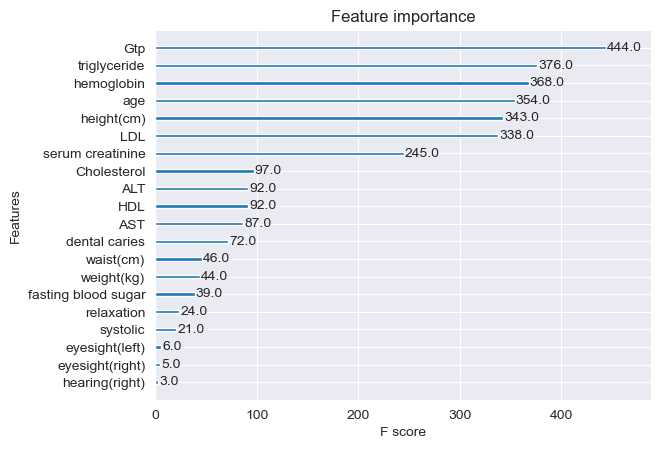

In [23]:
plot_importance(xgb_clf)

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,200,300,700] ,
    'max_depth' : [3,5,7],
    'learning_rate' : [0.1, 0.02, 0.05]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=10, n_jobs=-1, verbose=0, scoring='roc_auc')

grid_search.fit(x, y)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.02, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 700]},
             scoring='roc_auc')

In [30]:
estimator = grid_search.best_estimator_

In [31]:
estimator

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
cv = KFold(n_splits=5)

In [32]:
predictions = cross_val_predict(estimator=estimator,X = x, y=y, cv=cv)

In [35]:
print(f1_score(y, predictions, average='weighted'))

0.6501616642948291
